In [178]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease/heart.csv


In [179]:
heart = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


какую славную вы табличку подобрали, красота

мне было сказано что хорошо б избавиться от нерепрезентативного - ладно, избавлюсь

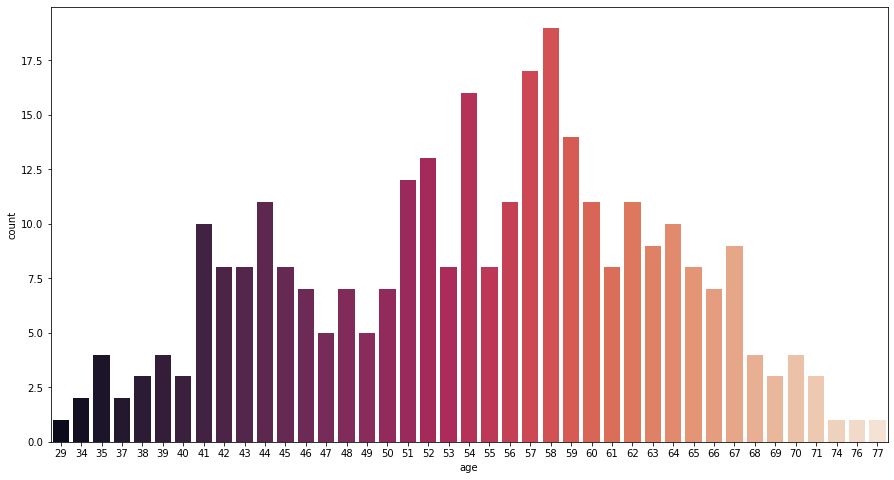

In [180]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'age', data = heart, palette = "rocket")

In [181]:
heart = heart[(heart['age']<70) & (heart['age']>40)]

# Постройте модель, предсказывающую, есть ли болезнь сердца у пациента?

In [182]:
X = heart.iloc[:,:-1]
Y = heart.iloc[:,-1]

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

приводим все в божеский вид

In [184]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [185]:
from sklearn import linear_model
classifier = linear_model.RidgeClassifier(alpha = 1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [186]:
from sklearn import svm
classifier2 = svm.SVC(kernel='linear')
classifier2.fit(X_train, Y_train)
Y2_pred = classifier2.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('ридж','классифаер', sep = '\t')
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

ридж	классифаер
[[22  4]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.88      0.97      0.92        29

    accuracy                           0.91        55
   macro avg       0.92      0.91      0.91        55
weighted avg       0.91      0.91      0.91        55

0.9090909090909091


In [188]:
print('метод','опорных', 'векторов', sep = '\t')
print(confusion_matrix(Y_test,Y2_pred))
print(classification_report(Y_test,Y2_pred))
print(accuracy_score(Y_test, Y2_pred))

метод	опорных	векторов
[[22  4]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.88      0.97      0.92        29

    accuracy                           0.91        55
   macro avg       0.92      0.91      0.91        55
weighted avg       0.91      0.91      0.91        55

0.9090909090909091


# У кого чаще встречаются болезни сердца (пол, возраст)? У кого реже?

сейчас 4 часа утра и я хуйней занимаюсь

In [225]:
index = [[str(bin(i))[2:].zfill(2)[0],str(bin(i))[2:].zfill(2)[1]] for i in range (0, 4)]

In [232]:
oppa = [len(heart[heart['sex'] == int(i[0])][heart['target'] == int(i[1])]) for i in index]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [233]:
oppa

[24, 62, 104, 84]

первое - здоровые женщины, второе - больные женщины, третье - здоровые мужчины, четвертое - больные мужчины

In [245]:
oppa[3]/(oppa[3]+oppa[2]) > oppa[1]/(oppa[1]+oppa[0])

False

значит женщины чаще болеют

In [238]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[oppa[2], oppa[0]], [oppa[3], oppa[1]]])

In [241]:
print('{:.10f}'.format(pvalue))

0.0000265680


оно меньше 0.05, значит различие статистически значимо

# Как зависит холестерин от возраста у здоровых людей?

In [189]:
zdor = heart[heart['target'] == 0]
age = zdor.loc[:, 'age'].values.reshape(-1, 1)
chol = zdor.loc[:, 'chol'].values.reshape(-1, 1)

а вот R**2

In [190]:
regression = linear_model.LinearRegression().fit(chol, age)
pred = regression.predict(chol)
regression.score(chol, age)

0.0013283670700495742

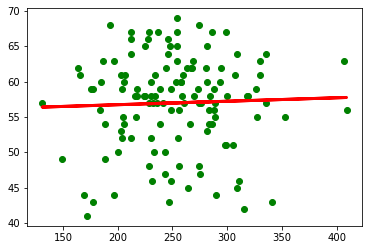

In [191]:
plt.scatter(chol, age,  color='green')
plt.plot(chol, pred, color='red', linewidth=3)


plt.show()

т.е. с возрастом холестерин выше но зависимость ооооооооочень слабая и R**2 говно